In [1]:
import re

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta, date, datetime

from pandas.plotting import register_matplotlib_converters

From an online table about when lockdowns began and ended, we parse out the start and end dates of lockdowns and begin plotting.

In [2]:
lockdown = pd.read_csv("lockdown-formatted.csv", parse_dates = ['Start date', 'End date'], index_col=['Unnamed: 0']).dropna()
lockdown

,State,Start date,End date
0,Alabama,April 4,April 30
1,Alaska,March 28,April 27
3,Arizona,March 31,May 15
5,California,March 19,December 3
6,Colorado,March 26,April 26
7,Connecticut,March 23,May 20
8,Delaware,March 24,May 31
9,Florida,April 2,May 4
10,Georgia,April 3,April 30
11,Hawaii,March 25,May 31


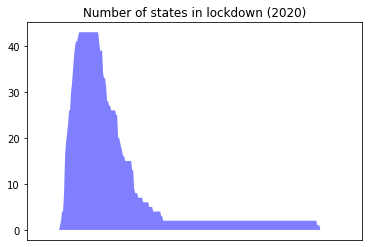

In [3]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2020, 3, 1)
end_date = date(2020, 12, 31)

dates = []
count = []

for single_date in daterange(start_date, end_date):
    dates.append(single_date.strftime("%Y-%m-%d"))
    c = 0
    for index, row in lockdown.iterrows():
        start = datetime.strptime(row['Start date'] + " 2020", '%B %d %Y').date()
        end = datetime.strptime(row['End date'] + " 2020", '%B %d %Y').date()
        
        # print (start, end, single_date)
        
        if single_date >= start and single_date <= end:
            c += 1
            
    count.append(c)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.xaxis.set_tick_params(length=0,labelbottom=False)
plt.title("Number of states in lockdown (2020)")
ax.fill(dates, count, facecolor='blue', alpha=0.5)

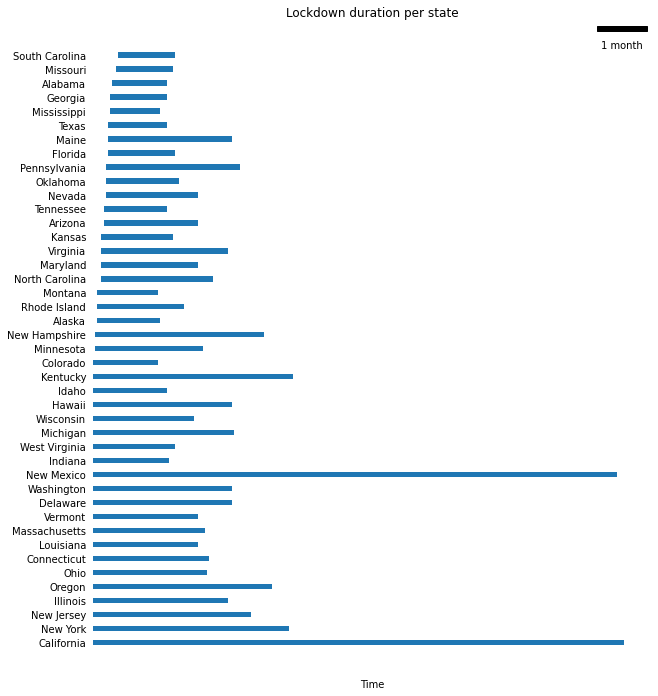

In [4]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm



lockdown['End date num'] = lockdown['End date'].apply(lambda s: datetime.strptime(s + " 2020", '%B %d %Y').date().toordinal())
lockdown['Start date num'] = lockdown['Start date'].apply(lambda s: datetime.strptime(s + " 2020", '%B %d %Y').date().toordinal())
lockdown = lockdown.sort_values(by='Start date num')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(12)
fig.set_figwidth(10)

[spine.set_visible(False) for spine in ax.spines.values()]

ax.xaxis.set_tick_params(length=0,labelbottom=False, labelright=False, labelleft=False)
ax.tick_params(bottom=True, left=False, labelbottom=False)

# use the plt.xticks function to custom labels
#plt.xticks(np.arange(5), lockdown['End date'], color='black', rotation=0, fontsize='8', horizontalalignment='right')

plt.xlabel("Time")
plt.title("Lockdown duration per state")
ax.barh(lockdown['State'], lockdown['End date num'] - lockdown['Start date num'], left = lockdown['Start date num'], 
        align='center', height=0.4)

fontprops = fm.FontProperties(size=10)
scalebar = AnchoredSizeBar(ax.transData,
                           24, '1 month', 'upper right', 
                           pad=0.3,
                           color='black',
                           frameon=False,
                           size_vertical=0.3,
                           fontproperties=fontprops,
                           sep=10)

ax.add_artist(scalebar)

In [5]:
# reference: https://gist.github.com/rogerallen/1583593

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [6]:
cases = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
cases.submission_date = cases.submission_date.apply(lambda x: datetime.strptime(x, '%m/%d/%Y').date())
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-10-15,DC,16166,NaN,NaN,34,0.0,638,NaN,NaN,0,0.0,10/16/2020 01:33:55 PM,NaN,NaN
1,2020-12-08,NM,109947,NaN,NaN,0,0.0,1756,NaN,NaN,0,0.0,12/09/2020 02:45:40 PM,NaN,Not agree
2,2021-01-01,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
3,2020-08-29,SD,12942,NaN,NaN,425,0.0,167,165.0,2.0,2,0.0,08/30/2020 02:49:52 PM,NaN,Agree
4,2020-04-30,IA,7145,NaN,NaN,302,0.0,162,NaN,NaN,14,0.0,05/01/2020 09:00:19 PM,Not agree,Not agree


In [7]:
state = 'New Mexico'

start, end = lockdown[lockdown.State == state].iloc[0, 1], lockdown[lockdown.State == state].iloc[0, 2]

temp = cases[cases.state == us_state_abbrev[state]].sort_values(by=['submission_date'])
# (temp['submission_date'] >= datetime.strptime(start + " 2020", '%B %d %Y').date()) & 
temp = temp[(temp['tot_cases'] > 0) &
            (temp['submission_date'] <= datetime.strptime(end + " 2020", '%B %d %Y').date())]
temp.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
18494,2020-03-11,NM,3,NaN,NaN,3,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,Not agree
4690,2020-03-12,NM,5,NaN,NaN,2,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,Not agree
13791,2020-03-13,NM,5,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,Not agree
15630,2020-03-14,NM,7,NaN,NaN,2,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,Not agree
17166,2020-03-15,NM,17,NaN,NaN,10,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,Not agree


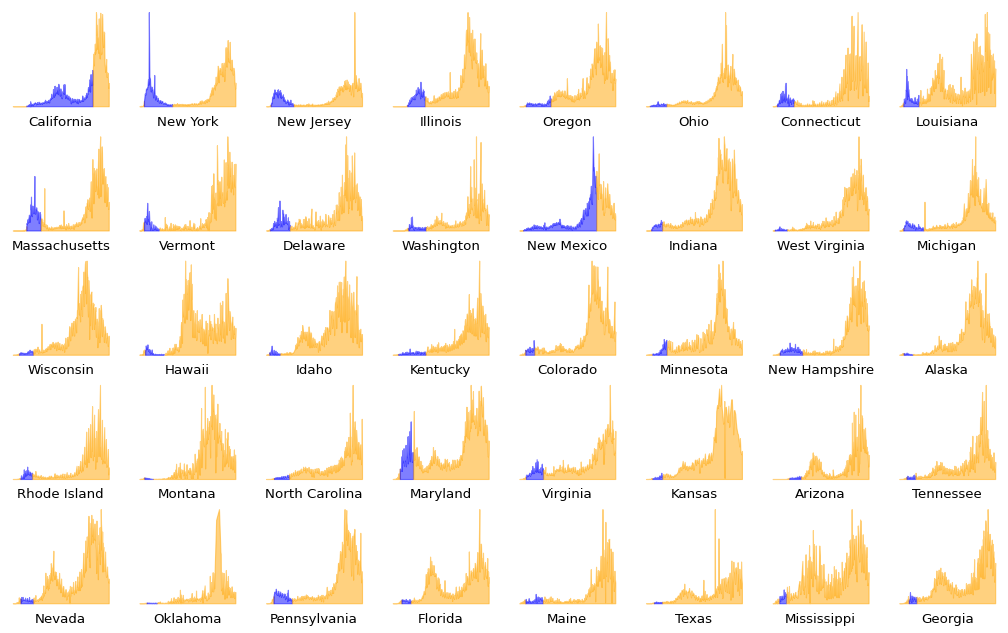

In [8]:
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

for i in range(40):
    state = lockdown.iloc[i, 0]

    start, end = lockdown[lockdown.State == state].iloc[0, 1], lockdown[lockdown.State == state].iloc[0, 2]

    temp = cases[cases.state == us_state_abbrev[state]].sort_values(by=['submission_date'])
    # (temp['submission_date'] >= datetime.strptime(start + " 2020", '%B %d %Y').date()) & 
    before = temp[(temp['tot_cases'] > 0) &
                (temp['submission_date'] <= datetime.strptime(start + " 2020", '%B %d %Y').date())]
    after = temp[(temp['new_case'] > 0) & (temp['submission_date'] >= datetime.strptime(start + " 2020", '%B %d %Y').date()) &
                (temp['submission_date'] <= datetime.strptime(end + " 2020", '%B %d %Y').date())]
    post = temp[(temp['new_case'] > 0) & (temp['submission_date'] > datetime.strptime(end + " 2020", '%B %d %Y').date())]
                
    ax = fig.add_subplot(6, 8, i + 1)
    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.fill_between(before.submission_date, before.new_case, 0, color='orange', alpha=0.5)
    ax.fill_between(after.submission_date, after.new_case, 0, color='blue', alpha=0.5)
    ax.fill_between(post.submission_date, post.new_case, 0, color='orange', alpha=0.5)
    
    ax.tick_params(axis='both', labelbottom=False, labelleft=False, bottom=False, left=False)
    ax.set_title(state, y=-0.2)

We then try to measure if there is a cumulative impact on cases after lockdown was begun. 

In [ ]:
!pip install pycausalimpact
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    3014.49            105507.2
Prediction (s.d.)         5019.69 (147.31)   175689.14 (5155.76)
95% CI                    [4742.51, 5319.94] [165987.74, 186197.94]

Absolute effect (s.d.)    -2005.2 (147.31)   -70181.94 (5155.76)
95% CI                    [-2305.45, -1728.02][-80690.74, -60480.54]

Relative effect (s.d.)    -39.95% (2.93%)    -39.95% (2.93%)
95% CI                    [-45.93%, -34.42%] [-45.93%, -34.42%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


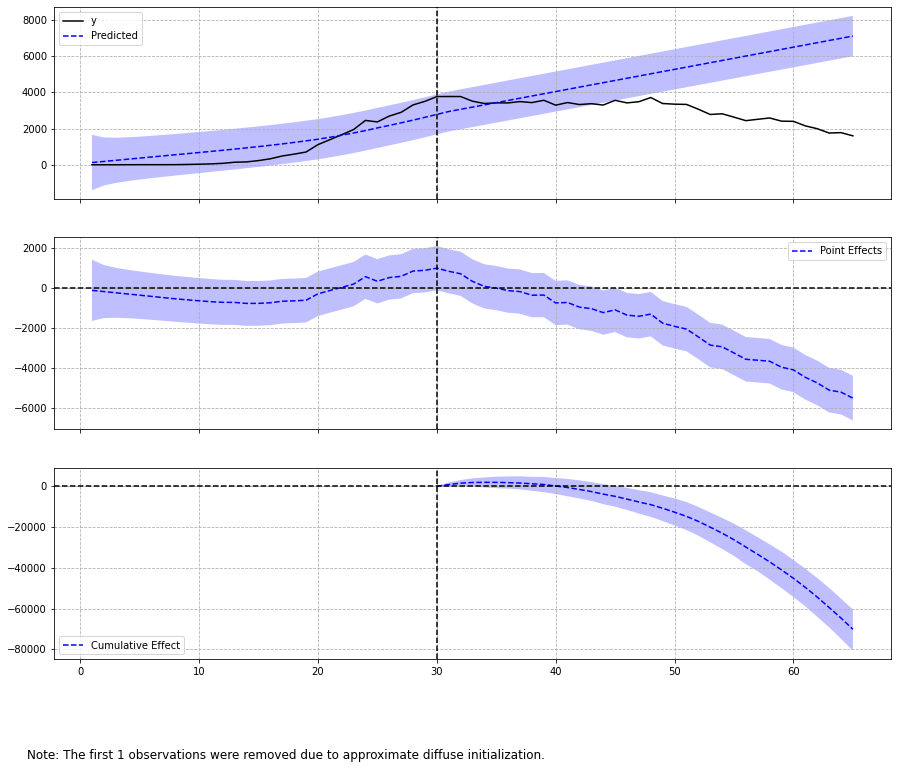

In [10]:
state = "New Jersey"

start, end = lockdown[lockdown.State == state].iloc[0, 1], lockdown[lockdown.State == state].iloc[0, 2]

temp = cases[cases.state == us_state_abbrev[state]].sort_values(by=['submission_date'])
temp = temp[temp['new_case'] > 0]
temp = temp[temp['new_case'] < 10000]
temp['new_case'] = temp['new_case'].rolling(window=5).mean()
#temp = temp[(temp['submission_date'] <= datetime.strptime(end + " 2020", '%B %d %Y').date())]
temp.head()

temp = temp.fillna(0)

X = np.arange(len(temp))
y = temp['new_case']
data = pd.DataFrame({'case': y, 'date': X}, columns=['case', 'date'])
data.index = np.arange(len(data))
start_val = datetime.strptime(start + " 2020", '%B %d %Y').date()
end_val = datetime.strptime(end + " 2020", '%B %d %Y').date()

temp['ticks'] = np.arange(len(temp))

tick1 = temp.loc[temp['submission_date'] == start_val, 'ticks']

tick2 = temp.loc[temp['submission_date'] == end_val, 'ticks']

pre_period = [int(tick1) - 15, int(tick1) + 15]
post_period = [int(tick1) + 16, int(tick1)+50]



ci = CausalImpact(data, list(pre_period), list(post_period))
print(ci.summary())
ci.plot()